# <center>Pokemon EDA</center>

### Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
%matplotlib inline

### Initializing the dataframe

In [3]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Looking for the null values

In [4]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

### Cleaning the dataframe

In [6]:
df.drop(columns=['#'], inplace=True)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Visualizing the correlation between vairables

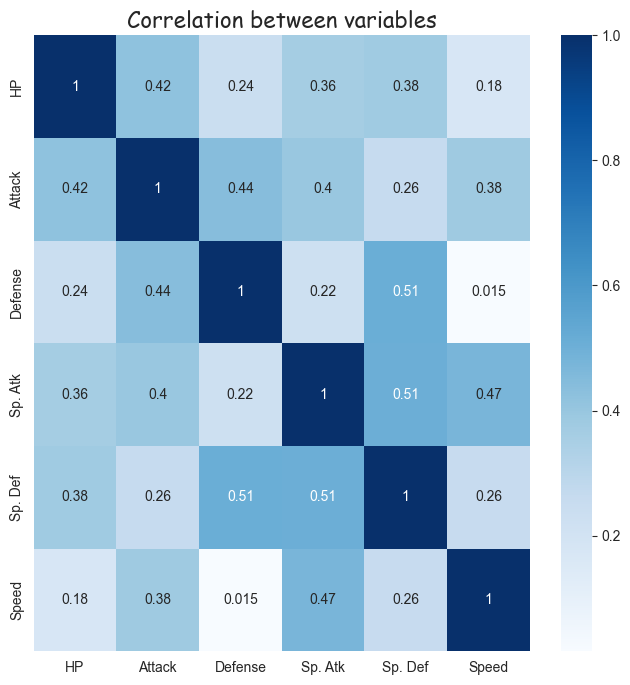

In [31]:
corr_df = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
corr_df.head()

plt.figure(figsize=(8, 8))
plt.title(label='Correlation between variables', fontdict={'family':'Comic Sans MS', 'size':16})
sns.heatmap(data=corr_df.corr(), annot=True, cmap='Blues')
plt.show()

Special Attack & Special Defence are positively correlated with Special Defence.  
And apparently, there are no negative correlations between any two variables.

### Analyzing the relationship between variables

In [42]:
# plt.figure(figsize=(15, 15))

# df_grid = sns.PairGrid(data=corr_df, palette='Set1')

# df_grid.map_diag(sns.countplot)
# df_grid.map_upper(sns.scatterplot)
# df_grid.map_lower(sns.kdeplot)

# df_grid.add_legend()

# plt.show()
# df['Legendary'].unique()